Download this page as a jupyter notebook at [Lab 10-TH](http://54.243.252.9/engr-1330-webroot/8-Labs/Lab10/Lab10-TH.ipynb)

# <font color=darkred>Laboratory 10: Databases </font>

**LAST NAME, FIRST NAME**

**R00000000**

ENGR 1330 Laboratory 10 - Homework

In [2]:
# Preamble script block to identify host, user, and kernel
import sys
! hostname
! whoami
print(sys.executable)
print(sys.version)
print(sys.version_info)

atomickitty
sensei
/opt/jupyterhub/bin/python3
3.8.10 (default, Sep 28 2021, 16:10:42) 
[GCC 9.3.0]
sys.version_info(major=3, minor=8, micro=10, releaselevel='final', serial=0)


## <font color=purple>Pandas Cheat Sheet(s)</font>
The Pandas library is a preferred tool for data scientists to perform data manipulation and analysis, next to matplotlib for data visualization and NumPy for scientific computing in Python. 

The fast, flexible, and expressive Pandas data structures are designed to make real-world data analysis significantly easier, but this might not be immediately the case for those who are just getting started with it. Exactly because there is so much functionality built into this package that the options are overwhelming.

Hence summary sheets will be useful

- A summary sheet: [https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf](https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf)

- A different one: [http://datacamp-community-prod.s3.amazonaws.com/f04456d7-8e61-482f-9cc9-da6f7f25fc9b](http://datacamp-community-prod.s3.amazonaws.com/f04456d7-8e61-482f-9cc9-da6f7f25fc9b)

In [3]:
import pandas
import numpy

# Exercise 1: Reading a File into a Dataframe

Pandas has methods to read common file types, such as `csv`,`xlsx`, and `json`.  Ordinary text files are also quite manageable.  (We will study these more in Lesson 11)

Here are the steps to follow:

1. Download the file [CSV_ReadingFile.csv](http://54.243.252.9/engr-1330-webroot/8-Labs/Lab10/CSV_ReadingFile.csv) to your local computer
2. Run the cell below - it connects to the file, reads it into the object `readfilecsv'
3. Print the contents of the object `readfilecsv'

In [5]:
# download the file (do this before running the script)
readfilecsv = pandas.read_csv('CSV_ReadingFile.csv')  # Reading a .csv file
# print the contents of readfilecsv 
print(readfilecsv)

    a   b   c   d
0   0   1   2   3
1   4   5   6   7
2   8   9  10  11
3  12  13  14  15


In [13]:
# How many rows are in the data table?  
print('Row count = ',readfilecsv.shape[0])
# How many columns?
print('Col count = ',readfilecsv.shape[1])

Row count =  4
Col count =  4


## Exercise 2
Now that you have downloaded and read a file, lets do it again, but with feeling! 

Download the file named [concreteData.xls](http://54.243.252.9/engr-1330-webroot/8-Labs/Lab10/concreteData.xls) to your local computer.

> The file is an Excel 97-2004 Workbook; you probably cannot inspect it within Anaconda (but maybe yes).  File size is about 130K, we are going to rely on Pandas to work here!

Read the file into a dataframe object named **'concreteData'** the method name is

> - object_name = pandas.read_excel(filename) 
> - It should work as above if you replace the correct placeholders

Then perform the following activities.

In [15]:
# Optional Automated Download or just 
#Get database -- use the Get Data From URL Script
#Step 1: import needed modules to interact with the internet
import requests
#Step 2: make the connection to the remote file (actually its implementing "bash curl -O http://fqdn/path ...")
remote_url = 'http://54.243.252.9/engr-1330-webroot/8-Labs/Lab10/concreteData.xls' # an Excel file
response = requests.get(remote_url) # Gets the file contents puts into an object
output = open('concreteData.xls', 'wb') # Prepare a destination, local
output.write(response.content) # write contents of object to named local file
output.close() # close the connection

1. Read the file into an object

In [15]:
# code here looks like object_name = pandas.read_excel(filename)  
concreteData = pandas.read_excel('concreteData.xls') 

1. Examine the first few rows of the dataframe and describe the structure (using words) in a markdown cell just after you run the descriptor method

In [16]:
# code here looks like object_name.head()
concreteData.head()

Cement (component 1)(kg in a m^3 mixture)  \
0                                      540.0   
1                                      540.0   
2                                      332.5   
3                                      332.5   
4                                      198.6   

   Blast Furnace Slag (component 2)(kg in a m^3 mixture)  \
0                                                0.0       
1                                                0.0       
2                                              142.5       
3                                              142.5       
4                                              132.4       

   Fly Ash (component 3)(kg in a m^3 mixture)  \
0                                         0.0   
1                                         0.0   
2                                         0.0   
3                                         0.0   
4                                         0.0   

   Water  (component 4)(kg in a m^3 mixture)  \
0                                      162.0   
1                                      162.0   
2                                      228.0   
3                                      228.0   
4                                      192.0   

   Superplasticizer (component 5)(kg in a m^3 mixture)  \
0                                                2.5     
1                                                2.5     
2                                                0.0     
3                                                0.0     
4                                                0.0     

   Coarse Aggregate  (component 6)(kg in a m^3 mixture)  \
0                                             1040.0      
1                                             1055.0      
2                                              932.0      
3                                              932.0      
4                                              978.4      

   Fine Aggregate (component 7)(kg in a m^3 mixture)  Age (day)  \
0                                              676.0         28   
1                                              676.0         28   
2                                              594.0        270   
3                                              594.0        365   
4                                              825.5        360   

   Concrete compressive strength(MPa, megapascals)   
0                                         79.986111  
1                                         61.887366  
2                                         40.269535  
3                                         41.052780  
4                                         44.296075

2. Simplify the column names to "Cement", "BlastFurnaceSlag", "FlyAsh", "Water", "Superplasticizer", "CoarseAggregate", "FineAggregate", "Age", "CC_Strength"

In [17]:
# code here
req_col_names = ["Cement", "BlastFurnaceSlag", "FlyAsh", "Water", "Superplasticizer",
                 "CoarseAggregate", "FineAggregate", "Age", "CC_Strength"]
curr_col_names = list(concreteData.columns)

mapper = {}
for i, name in enumerate(curr_col_names):
    mapper[name] = req_col_names[i]

concreteData = concreteData.rename(columns=mapper)

concreteData.head()

Cement  BlastFurnaceSlag  FlyAsh  Water  Superplasticizer  CoarseAggregate  \
0   540.0               0.0     0.0  162.0               2.5           1040.0   
1   540.0               0.0     0.0  162.0               2.5           1055.0   
2   332.5             142.5     0.0  228.0               0.0            932.0   
3   332.5             142.5     0.0  228.0               0.0            932.0   
4   198.6             132.4     0.0  192.0               0.0            978.4   

   FineAggregate  Age  CC_Strength  
0          676.0   28    79.986111  
1          676.0   28    61.887366  
2          594.0  270    40.269535  
3          594.0  365    41.052780  
4          825.5  360    44.296075

3. Determine and report summary statistics for each of the columns.

In [18]:
# code here
concreteData.describe()

Cement  BlastFurnaceSlag       FlyAsh        Water  \
count  1030.000000       1030.000000  1030.000000  1030.000000   
mean    281.165631         73.895485    54.187136   181.566359   
std     104.507142         86.279104    63.996469    21.355567   
min     102.000000          0.000000     0.000000   121.750000   
25%     192.375000          0.000000     0.000000   164.900000   
50%     272.900000         22.000000     0.000000   185.000000   
75%     350.000000        142.950000   118.270000   192.000000   
max     540.000000        359.400000   200.100000   247.000000   

       Superplasticizer  CoarseAggregate  FineAggregate          Age  \
count       1030.000000      1030.000000    1030.000000  1030.000000   
mean           6.203112       972.918592     773.578883    45.662136   
std            5.973492        77.753818      80.175427    63.169912   
min            0.000000       801.000000     594.000000     1.000000   
25%            0.000000       932.000000     730.950000     7.000000   
50%            6.350000       968.000000     779.510000    28.000000   
75%           10.160000      1029.400000     824.000000    56.000000   
max           32.200000      1145.000000     992.600000   365.000000   

       CC_Strength  
count  1030.000000  
mean     35.817836  
std      16.705679  
min       2.331808  
25%      23.707115  
50%      34.442774  
75%      46.136287  
max      82.599225

4. Then run the script below into your notebook (after the summary statistics), describe the output (using words) in a markdown cell.
   

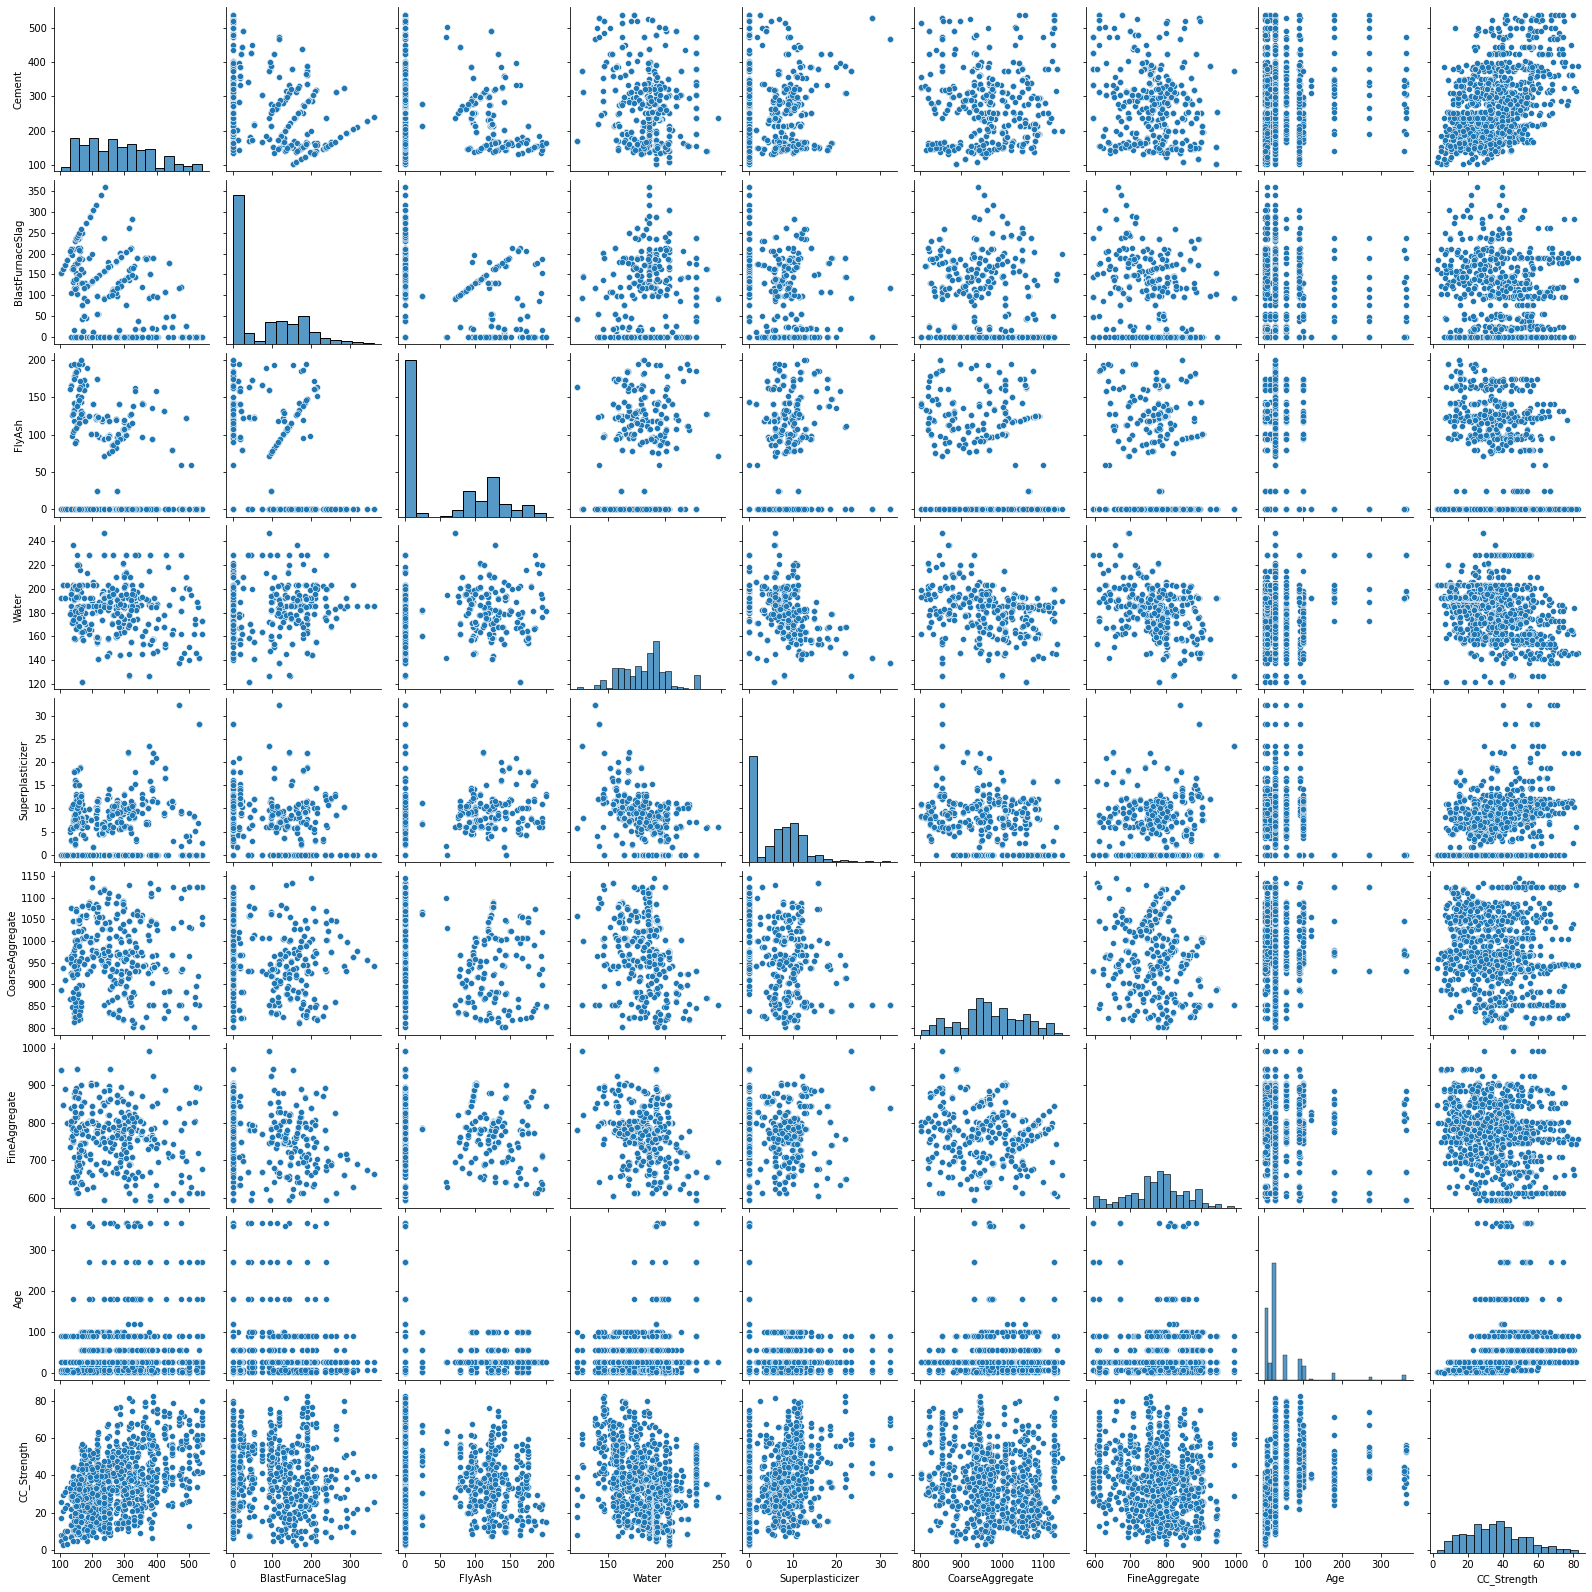

In [19]:
# After concreteData exists, and is non-empty; how do you know?
# then run the code block below -- It takes awhile to render output, give it a minute:
import matplotlib.pyplot  
import seaborn 
%matplotlib inline
seaborn.pairplot(concreteData)
matplotlib.pyplot.show()

### specify/summarize the output here!
Output is a graphic that contains a matrix of plots of the relationship of each column with another column.  
The main diagional are histograms of the variable represented by the column.  None of the individual plots indicate a strength -to -variable relationship, so it is likely multiple variables are required to build a prediction engine.
